In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('migration.csv')
data

,Country Name,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012
0,Arab World,-485569,-849826,-876979,1697107,103693,-1021606,293332,-1432980,396646,4413525,-1168750
1,Caribbean small states,-247909,-316430,-289373,-284532,-303086,-387993,-249602,-181604,-174651,-127609,-124122
2,Central Europe and the Baltics,112936,-227571,-104933,-85960,-279101,-819390,-1514119,-1176975,-593078,-811784,-770310
3,Early-demographic dividend,-1127882,-2453929,-3192784,-4981537,1228808,-1903124,-8288636,-7729474,-14370853,-14314078,-12621653
4,East Asia & Pacific,-479477,628975,-808879,-1454415,713290,392043,-2395809,-385097,-2992651,-5719538,-1457489
...,...,...,...,...,...,...,...,...,...,...,...,...
228,Vietnam,0,0,0,-813123,-324942,-332327,-394236,-216001,-772336,-877681,-200002
229,Virgin Islands (U.S.),10270,3245,9407,1961,-3492,-11156,-4618,-3936,-5272,-6191,-3604
230,"Yemen, Rep.",-100000,-245662,-353000,-75000,-50000,-50000,672800,-100000,-100000,0,-50000
231,Zambia,2500,-4245,26662,17573,58483,2822,-22952,79445,-93014,-124044,-34490


In [4]:
new_data =data.drop('Country Name',axis =1)

In [5]:
new_data.isnull().sum()

1962    0
1967    0
1972    0
1977    0
1982    0
1987    0
1992    0
1997    0
2002    0
2007    0
2012    0
dtype: int64

In [6]:
data.columns

Index(['Country Name', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007', '2012'],
      dtype='object')

In [7]:
sse = []
for k in range(1,16):
    km =KMeans(n_clusters=k)
    km.fit(new_data)
    sse.append(km.inertia_)

Text(0, 0.5, 'sse')

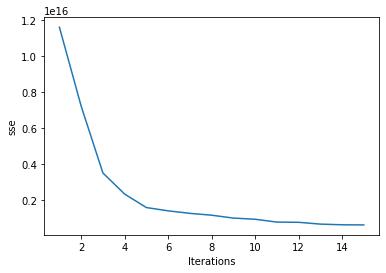

In [8]:
plt.plot(range(1,16),sse)
plt.xlabel('Iterations')
plt.ylabel('sse')

In [9]:
km_model = KMeans(n_clusters=5)
prediction = km_model.fit_predict(new_data)

In [10]:
prediction

array([0, 0, 0, 1, 3, 3, 3, 4, 4, 0, 0, 4, 3, 3, 2, 0, 3, 3, 3, 3, 1, 3,
       1, 0, 0, 0, 1, 4, 2, 0, 0, 2, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
clustered_result = pd.DataFrame({'Country Name': data['Country Name'], 'cluster': prediction})

In [12]:
clustered_result

,Country Name,cluster
0,Arab World,0
1,Caribbean small states,0
2,Central Europe and the Baltics,0
3,Early-demographic dividend,1
4,East Asia & Pacific,3
...,...,...
228,Vietnam,0
229,Virgin Islands (U.S.),0
230,"Yemen, Rep.",0
231,Zambia,0


In [13]:
km_model.labels_

array([0, 0, 0, 1, 3, 3, 3, 4, 4, 0, 0, 4, 3, 3, 2, 0, 3, 3, 3, 3, 1, 3,
       1, 0, 0, 0, 1, 4, 2, 0, 0, 2, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(new_data, km_model.labels_)

0.7720601475450093